In [150]:
%reload_ext autoreload
%autoreload 2

In [1]:
#1
from fastai.conv_learner import *
from matplotlib import patches, patheffects
from collections import defaultdict

In [2]:
#2
coco_path = Path('/scratch/arka/Ark_git_files/coco/')
ann_path = coco_path / 'annotations'
train_path = coco_path / 'train2017'
val_path = coco_path / 'val2017'

In [3]:
instances_train2017 = json.load((ann_path / 'instances_train2017.json').open('r'))
instances_val2017 = json.load((ann_path / 'instances_val2017.json').open('r'))

In [4]:
IMAGES,ANNOTATIONS,CATEGORIES = ['images', 'annotations', 'categories']

In [5]:
FILE_NAME,ID,IMG_ID,CAT_ID,BBOX = 'file_name','id','image_id','category_id','bbox'

In [6]:
JPEGS = 'imgs'

In [7]:
cats = json.load(open('category.json', 'r'))
trn_fns = json.load(open('trn_fns.json', 'r'))
trn_ids = json.load(open('trn_ids.json', 'r'))
trn_ids = [str(o) for o in trn_ids]
trn_anno = json.load(open('trn_anno.json', 'r'))

In [8]:
def bb_hw(a): return np.array([a[1],a[0],a[3]-a[1],a[2]-a[0]])

## Stop. See below when to continue

In [ ]:
trn_fns_corr = dict()
for k, v in tqdm(trn_fns.items()):
    if k in trn_ids:
        trn_fns_corr[k] = v

In [ ]:
cats = dict((o[ID], o['name']) for o in instances_train2017[CATEGORIES])
trn_fns = dict((o[ID], o[FILE_NAME]) for o in instances_train2017[IMAGES])
trn_ids = [o[ID] for o in instances_train2017[IMAGES]]


In [ ]:
for key,value in cats.items():
    if (' ' in value):       
        cats[key]=value.replace(' ','_')
#         print(key, value)

In [ ]:
trn_anno = collections.defaultdict(list)
for o in instances_train2017[ANNOTATIONS]:
    bb1 = o[BBOX]
    assert len(bb1) == 4
    bb = bb1
#     print(bb)
    bb = np.array([bb[1], bb[0], bb[3]+bb[1]-1, bb[2]+bb[0]-1])
    
    trn_anno[o[IMG_ID]].append((bb.tolist(),o[CAT_ID]))
        
len(trn_anno)

In [ ]:
cdict = defaultdict(list)
for o in trn_ids:
    ann = trn_anno[o]
    for a in ann:
        cdict[o].append(a[1])

In [ ]:
cdict[o]

In [ ]:
dfm = pd.DataFrame({'fn': [trn_fns[o] for o in trn_ids],
    'cat': [' '.join([cats[str(p)] for p in cdict[o]]) for o in trn_ids]}, columns=['fn','cat'])
csvs = coco_path / 'csv_new' / 'train_cls.csv'
csvs.parent.mkdir(exist_ok=True, parents=True)
dfm.to_csv(csvs, index=False)

In [ ]:
np.round(a[0]).astype(int)

In [ ]:
bdict = defaultdict(list)
for o in trn_ids:
    ann = trn_anno[o]
    for a in ann:
        bdict[o].append(str(np.round(a[0]).astype(int).tolist()).strip('[').strip(']').replace(',',''))

In [ ]:
bdict[o][0]

In [ ]:
' '.join(bdict[o])

In [ ]:
json.dump(cats, open('category.json', 'w'))
json.dump(trn_fns_corr, open('trn_fns.json', 'w'))
json.dump(trn_ids_corr, open('trn_ids.json', 'w'))
# json.dump(trn_anno, open('trn_anno.json', 'w'))

In [ ]:
df = pd.DataFrame({'fn': [trn_fns[o] for o in trn_ids], 
                   'bbox': [' '.join(bdict[o]) for o in trn_ids]}, columns=['fn','bbox'])
csvs = coco_path / 'csv_new' / 'train_bbx.csv'
csvs.parent.mkdir(exist_ok=True, parents=True)
df.to_csv(csvs, index=False)

In [ ]:
df.head()

In [ ]:
df['bbox'][1].split(' ')

## Continue from here

In [115]:
x = md.trn_ds.get_x(984)
y = md.trn_ds.get_y(984)

In [125]:
md.trn_ds.transform

[<fastai.transforms.Scale object at 0x7ff0b34742e8>, <fastai.transforms.RandomRotate object at 0x7ff0b3474128>, <fastai.transforms.RandomLighting object at 0x7ff0b34740b8>, <fastai.transforms.RandomFlip object at 0x7ff0b3474160>, <fastai.transforms.NoCrop object at 0x7ff0b3474358>, <fastai.transforms.Normalize object at 0x7ff0b3468b38>, <fastai.transforms.ChannelOrder object at 0x7ff0b3474390>]

In [142]:
md.trn_ds.transform(x, y)

(array([[[ 1.37121,  1.39415,  1.39948, ...,  1.54738,  1.52075,  1.506  ],
         [ 1.38038,  1.39202,  1.38948, ...,  1.52116,  1.54189,  1.50567],
         [ 1.38992,  1.39472,  1.38697, ...,  1.50603,  1.55481,  1.50969],
         ...,
         [ 0.07386,  0.12286,  0.10819, ...,  0.15536,  0.11901,  0.23853],
         [-0.02213,  0.10297,  0.11404, ...,  0.20909,  0.23354,  0.25779],
         [-0.10677,  0.12895,  0.12649, ...,  0.28587,  0.35047,  0.19396]],
 
        [[ 1.51382,  1.53728,  1.54273, ...,  1.65903,  1.6318 ,  1.61672],
         [ 1.52321,  1.5351 ,  1.53251, ...,  1.63222,  1.65342,  1.61639],
         [ 1.53295,  1.53787,  1.52994, ...,  1.61675,  1.66663,  1.62049],
         ...,
         [ 0.22351,  0.28444,  0.27782, ...,  0.30575,  0.26858,  0.39078],
         [ 0.14633,  0.28383,  0.28179, ...,  0.36285,  0.38567,  0.40734],
         [ 0.09012,  0.33166,  0.29452, ...,  0.44461,  0.50521,  0.33739]],
 
        [[ 1.86832,  1.88444,  1.86234, ...,  2.065  ,

In [109]:
md.trn_y[983]

array([128.,  67., 183.,  94., 276., 270., 457., 545., 345.,  95., 461., 265., 249.,  43., 366., 208., 146.,
       396., 238., 614., 189., 428., 354., 639., 172., 204., 334., 362.,  51.,   0., 144., 148.,  96., 369.,
       197., 639.,  37., 226., 119., 444., 110., 117., 234., 295., 111.,   0., 210.,  59.,  66., 303., 145.,
       433., 416.,   0., 479., 100.,  42., 500., 154., 615.], dtype=float32)

In [108]:
md.trn_y[984]

array([120., 368., 122., 377., 123., 190., 125., 203.], dtype=float32)

In [99]:
c = 0
for x, y in tqdm(md.trn_ds):
    if len(y.nonzero()[0]) == 0:
        print(c)
    c += 1

100%|██████████| 93813/93813 [2:08:50<00:00, 12.14it/s]


In [100]:
MBB_CSV = coco_path / 'csv_new' / 'train_bbx.csv'
JPEGS = 'imgs'
sz=224
bs=32
f_model = resnet34
aug_tfms = [RandomRotate(3, p=0.5, tfm_y=TfmType.COORD),
            RandomLighting(0.05, 0.05, tfm_y=TfmType.COORD),
            RandomFlip(tfm_y=TfmType.COORD)]
tfms = tfms_from_model(f_model, sz, aug_tfms=aug_tfms, crop_type=CropType.NO, tfm_y=TfmType.COORD)
md = ImageClassifierData.from_csv(coco_path, JPEGS, MBB_CSV, tfms=tfms, bs=bs, continuous=True, num_workers=4)

In [10]:
import matplotlib.cm as cmx
import matplotlib.colors as mcolors
from cycler import cycler

def get_cmap(N):
    color_norm  = mcolors.Normalize(vmin=0, vmax=N-1)
    return cmx.ScalarMappable(norm=color_norm, cmap='Set3').to_rgba

num_colr = 12
cmap = get_cmap(num_colr)
colr_list = [cmap(float(x)) for x in range(num_colr)]

In [11]:
def show_ground_truth(ax, im, bbox, clas=None, prs=None, thresh=0.3):
    bb = [bb_hw(o) for o in bbox.reshape(-1,4)]
    if prs is None:  prs  = [None]*len(bb)
    if clas is None: clas = [None]*len(bb)
    ax = show_img(im, ax=ax)
    for i,(b,c,pr) in enumerate(zip(bb, clas, prs)):
        if((b[2]>0) and (pr is None or pr > thresh)):
            draw_rect(ax, b, color=colr_list[i%num_colr])
            txt = f'{i}: '
            if c is not None: txt += ('bg' if c==len(id2cat) else id2cat[c])
            if pr is not None: txt += f' {pr:.2f}'
            draw_text(ax, b[:2], txt, color=colr_list[i%num_colr])

In [12]:
class ConcatLblDataset(Dataset):
    def __init__(self, ds, y2):
        self.ds,self.y2 = ds,y2
        self.sz = ds.sz
    def __len__(self): return len(self.ds)
    
    def __getitem__(self, i):
        x,y = self.ds[i]
        return (x, (y,self.y2[i]))


In [13]:
mc = [[cats[str(p[1])] for p in trn_anno[o]] for o in trn_ids]
# mc = [[cats[p[1]] for p in trn_anno[o]] for o in trn_ids]

# mc = []
# trn_ids_corr = []
# for o in trn_ids:
#     if o in trn_anno:
#         tmpl = [cats[str(p[1])] for p in trn_anno[o]]
#         mc.append(tmpl)
#         trn_ids_corr.append(o)
#     else:
#         print(o)
id2cat = list(cats.values())
cat2id = {v:k for k,v in enumerate(id2cat)}
mcs = np.array([np.array([cat2id[p] for p in o]) for o in mc]); mcs

array([array([3, 0, 0, 1]), array([ 0, 43, 55, 71]),
       array([19, 19, 19, 19, 19, 25, 19,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 19, 19, 19,  0]),
       ...,
       array([56, 56,  0, 28, 39, 39, 39, 39, 39, 39, 39, 39, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 60,
       73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 39, 39, 39, 39, 40, 40]),
       array([39, 39,  0,  0,  0, 40, 40, 40,  0,  0, 39,  0, 41]),
       array([ 0,  0,  0,  0,  0, 40, 40, 40, 40, 41, 71,  0, 72])], dtype=object)

In [14]:
val_idxs = get_cv_idxs(len(trn_ids))
((val_mcs,trn_mcs),) = split_by_idx(val_idxs, mcs)

In [15]:
assert len(trn_ids) == len(trn_fns)
assert len(trn_ids) == len(trn_anno)

In [16]:
len(md.trn_ds), len(trn_mcs)

(93813, 93813)

In [17]:
trn_ds2 = ConcatLblDataset(md.trn_ds, trn_mcs)
val_ds2 = ConcatLblDataset(md.val_ds, val_mcs)
md.trn_dl.dataset = trn_ds2
md.fix_dl.dataset = trn_ds2
md.val_dl.dataset = val_ds2
md.aug_dl.dataset = val_ds2

In [18]:
x,y=to_np(next(iter(md.trn_dl)))
x=md.trn_ds.ds.denorm(x)


In [19]:
def show_img(im, figsize=None, ax=None):
    if not ax: fig,ax = plt.subplots(figsize=figsize)
    ax.imshow(im)
    ax.set_xticks(np.linspace(0, 224, 8))
    ax.set_yticks(np.linspace(0, 224, 8))
    ax.grid()
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    return ax

def draw_outline(o, lw):
    o.set_path_effects([patheffects.Stroke(
        linewidth=lw, foreground='black'), patheffects.Normal()])

def draw_rect(ax, b, color='white'):
    patch = ax.add_patch(patches.Rectangle(b[:2], *b[-2:], fill=False, edgecolor=color, lw=2))
    draw_outline(patch, 4)

def draw_text(ax, xy, txt, sz=14, color='white'):
    text = ax.text(*xy, txt,
        verticalalignment='top', color=color, fontsize=sz, weight='bold')
    draw_outline(text, 1)

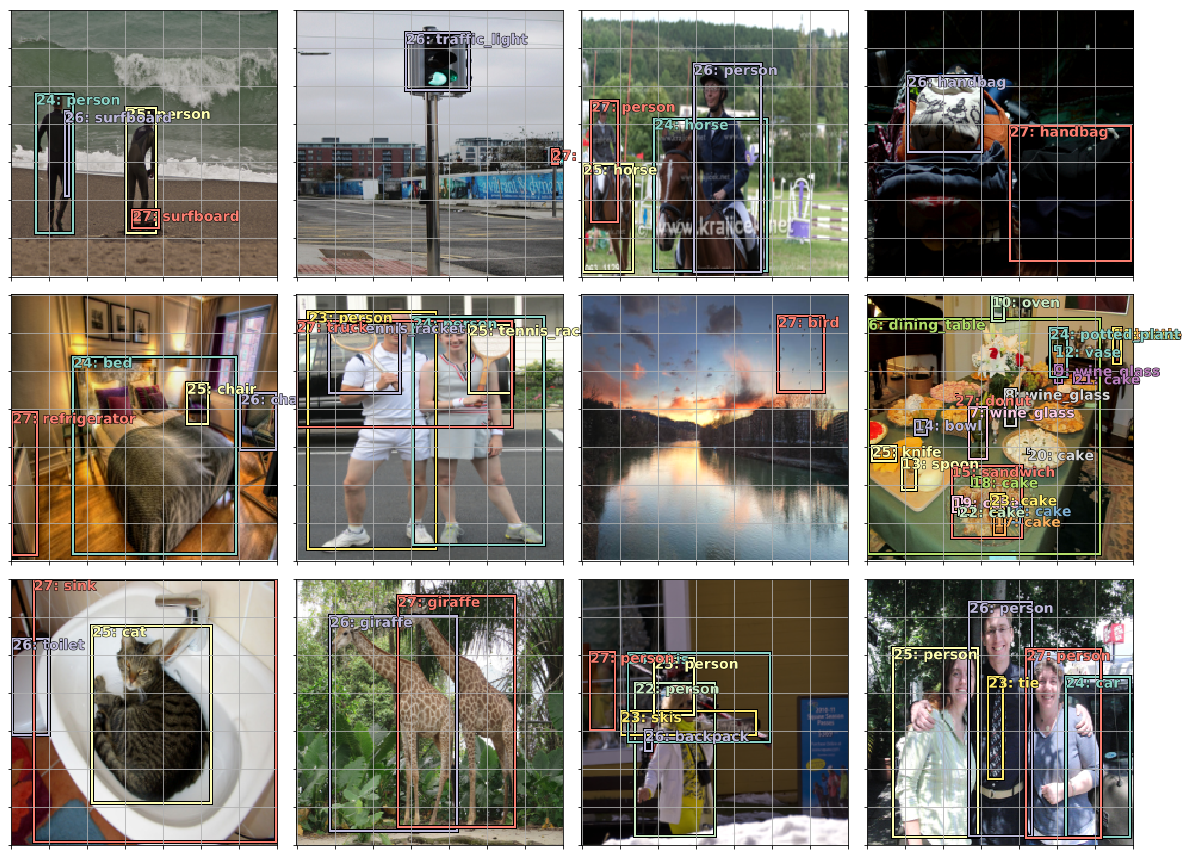

In [20]:
fig, axes = plt.subplots(3, 4, figsize=(16, 12))
for i,ax in enumerate(axes.flat):
    show_ground_truth(ax, x[i], y[0][i], y[1][i])
plt.tight_layout()

In [22]:
def hw2corners(ctr, hw): return torch.cat([ctr-hw/2, ctr+hw/2], dim=1)

In [23]:
k = 1
anc_grids = [28,14,7,4,2] #Depends of the initial size 224.
# anc_zooms = [1., 2**(1/3), 2**(2/3)]
anc_zooms = [1]
# anc_ratios = [(1.,1.), (1.,2), (2,1.)]
anc_ratios = [(1.,1.)]
anchor_scales = [(anz*i,anz*j) for anz in anc_zooms for (i,j) in anc_ratios]
anc_offsets = [1/(o*2) for o in anc_grids]
anc_x = np.concatenate([np.tile(np.linspace(ao, 1-ao, ag), ag)
                        for ao,ag in zip(anc_offsets,anc_grids)])
anc_y = np.concatenate([np.repeat(np.linspace(ao, 1-ao, ag), ag)
                        for ao,ag in zip(anc_offsets,anc_grids)])
anc_ctrs = np.repeat(np.stack([anc_x,anc_y], axis=1), k, axis=0)
anc_sizes  =   np.concatenate([np.array([[o/ag,p/ag] for i in range(ag*ag) for o,p in anchor_scales])
               for ag in anc_grids])
grid_sizes = V(np.concatenate([np.array([ 1/ag       for i in range(ag*ag) for o,p in anchor_scales])
               for ag in anc_grids]), requires_grad=False).unsqueeze(1)
anchors = V(np.concatenate([anc_ctrs, anc_sizes], axis=1), requires_grad=False).float()
anchor_cnr = hw2corners(anchors[:,:2], anchors[:,2:])


In [24]:
anchors.size()

torch.Size([1049, 4])

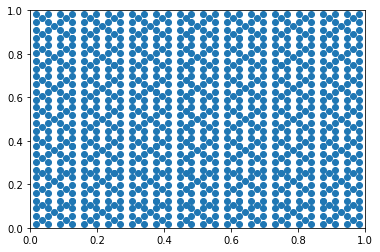

In [25]:
plt.scatter(anc_x, anc_y)
plt.xlim(0, 1)
plt.ylim(0, 1);

In [26]:
n_clas = len(id2cat)+1
n_act = k*(4+n_clas)

## Creating the Model

### Backbone

In [27]:
res50 = resnet50(pretrained=True)

In [28]:
def pad_out(k):
    return (k-1)//2

In [29]:
class FPN_backbone(nn.Module):
    def __init__(self, inch_list):
        super().__init__()
        
#         self.backbone = backbone
        
        # expects c3, c4, c5 channel dims
        self.inch_list = inch_list
        self.feat_size = 256
        self.p7_gen = nn.Conv2d(in_channels=self.feat_size, out_channels=self.feat_size, stride=2, kernel_size=3,
                               padding=1)
        self.p6_gen = nn.Conv2d(in_channels=self.inch_list[2], 
                            out_channels=self.feat_size, kernel_size=3, stride=2, padding=pad_out(3))
        self.p5_gen1 = nn.Conv2d(in_channels=self.inch_list[2], 
                                 out_channels=self.feat_size, kernel_size=1, padding=pad_out(1))
#         self.p5_gen2 = nn.Upsample(scale_factor=2, mode='nearest')
        self.p5_gen3 = nn.Conv2d(in_channels=self.feat_size, out_channels=self.feat_size,
                                kernel_size=3, padding=pad_out(3))
        
        self.p4_gen1 = nn.Conv2d(in_channels=self.inch_list[1], out_channels=self.feat_size, kernel_size=1,
                                padding=pad_out(1))
#         self.p4_gen2 = nn.Upsample(scale_factor=2, mode='nearest')
        self.p4_gen3 = nn.Conv2d(in_channels=self.feat_size, out_channels=self.feat_size, kernel_size=3, 
                                padding=pad_out(3))
        
        self.p3_gen1 = nn.Conv2d(in_channels=self.inch_list[0], out_channels=self.feat_size, kernel_size=1,
                                padding=pad_out(1))
        self.p3_gen2 = nn.Conv2d(in_channels=self.feat_size, out_channels=self.feat_size, kernel_size=3,
                                padding=pad_out(3))
        
    def forward(self, inp):
        # expects inp to be output of c3, c4, c5
        c3 = inp[0]
        c4 = inp[1]
        c5 = inp[2]
        p51 = self.p5_gen1(c5)
        p5_out = self.p5_gen3(p51)
        
#         p5_up = self.p5_gen2(p51)
        p5_up = F.interpolate(p51, scale_factor=2)
        p41 = self.p4_gen1(c4) + p5_up
        p4_out = self.p4_gen3(p41)
        
#         p4_up = self.p4_gen2(p41)
        p4_up = F.interpolate(p41, scale_factor=2)
        p31 = self.p3_gen1(c3) + p4_up
        p3_out = self.p3_gen2(p31)
        
        p6_out = self.p6_gen(c5)
        
        p7_out = self.p7_gen(F.relu(p6_out))
        
        return [p3_out, p4_out, p5_out, p6_out, p7_out]
        

In [30]:
def flatten_conv(x,k):
    bs,nf,gx,gy = x.size()
    x = x.permute(0,2,3,1).contiguous()
    return x.view(bs,-1,nf//k)

In [31]:
def initialize_vals(mdl):
    for m in mdl.modules():
        if isinstance(m, nn.Conv2d):
            n = m.kernel_size[0] * m.kernel_size[1] * m.out_channels
            m.weight.data.normal_(0, math.sqrt(2. / n))
        elif isinstance(m, nn.BatchNorm2d):
            m.weight.data.fill_(1)
            m.bias.data.zero_()
    

In [32]:
class classf_model(nn.Module):
    def __init__(self, fs=256, na=9, nc=80):
        super().__init__()
        self.na = na
        self.nc = nc
        self.feat_size = fs
        self.cls_modl = nn.Sequential(*nn.ModuleList([nn.Conv2d(in_channels=self.feat_size,
                                                                           out_channels=self.feat_size,
                                                                           kernel_size=3, padding=1)]*4),
                                                  nn.Conv2d(in_channels=self.feat_size,
                                                            out_channels=self.na * self.nc,
                                                            kernel_size=3, padding=1))
        initialize_vals(self.cls_modl)
    def forward(self, inp):
#         import pdb; pdb.set_trace();
        out = self.cls_modl(inp)
        out2 = flatten_conv(out, self.na)
        return out2

In [33]:
class regress_model(nn.Module):
    def __init__(self, fs=256, na=9, nc=80):
        super().__init__()
        self.na = na
        self.nc = nc
        self.feat_size = fs
        self.reg_model = nn.Sequential(*nn.ModuleList([nn.Conv2d(in_channels=self.feat_size,
                                                                           out_channels=self.feat_size,
                                                                           kernel_size=3, padding=1)]*4),
                                                  nn.Conv2d(in_channels=self.feat_size,
                                                            out_channels=self.na * 4,
                                                            kernel_size=3, padding=1))
        initialize_vals(self.reg_model)
    def forward(self, inp):
        out = self.reg_model(inp)
        out2 = flatten_conv(out, self.na)
        return out2

In [34]:
class retina_net_model(nn.Module):
    def __init__(self, resnet_model, na=9, nc=81):
        super().__init__()
        self.res_backbone = resnet_model
        self.fpn_sizes = [self.res_backbone.layer2[-1].conv3.out_channels, 
                          self.res_backbone.layer3[-1].conv3.out_channels,
                          self.res_backbone.layer4[-1].conv3.out_channels]
        self.feat_size = 256
        self.num_anch = na
        self.num_class = nc
        self.fpn = FPN_backbone(self.fpn_sizes)
        self.cls_model = classf_model(self.feat_size, self.num_anch, self.num_class)
        self.reg_model = regress_model(self.feat_size, self.num_anch, self.num_class)
        
        
    def forward(self, inp):
        x = self.res_backbone.conv1(inp)
        x = self.res_backbone.bn1(x)
        x = self.res_backbone.relu(x)
        x = self.res_backbone.maxpool(x)
        x1 = self.res_backbone.layer1(x)
        x2 = self.res_backbone.layer2(x1)
        x3 = self.res_backbone.layer3(x2)
        x4 = self.res_backbone.layer4(x3)

        features = self.fpn([x2, x3, x4])
#         features = self.fpn([x4])
        out_cls = []
        out_bbx = []
        for p in features:
            out_cls.append(self.cls_model(p))
            out_bbx.append(self.reg_model(p))
        
        return [torch.cat(out_cls, dim=1),
                torch.cat(out_bbx, dim=1)]

In [35]:
def one_hot_embedding(labels, num_classes):
    return torch.eye(num_classes)[labels.data.cpu()]

In [36]:
class BCE_Loss(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.num_classes = num_classes

    def forward(self, pred, targ):
        t = one_hot_embedding(targ, self.num_classes+1)
        t = V(t[:,:-1].contiguous())#.cpu()
        x = pred[:,:-1]
        w = self.get_weight(x,t)
        return F.binary_cross_entropy_with_logits(x, t, w, reduction='element_wise_mean')/self.num_classes
    
    def get_weight(self,x,t): return None

    
def intersect(box_a, box_b):
    max_xy = torch.min(box_a[:, None, 2:], box_b[None, :, 2:])
    min_xy = torch.max(box_a[:, None, :2], box_b[None, :, :2])
    inter = torch.clamp((max_xy - min_xy), min=0)
    return inter[:, :, 0] * inter[:, :, 1]

def box_sz(b): return ((b[:, 2]-b[:, 0]) * (b[:, 3]-b[:, 1]))

def jaccard(box_a, box_b):
    inter = intersect(box_a, box_b)
    union = box_sz(box_a).unsqueeze(1) + box_sz(box_b).unsqueeze(0) - inter
    return inter / union

In [37]:
def get_y(bbox,clas):
    bbox = bbox.view(-1,4)/sz
    bb_keep = ((bbox[:,2]-bbox[:,0])>0).nonzero()[:,0]
    return bbox[bb_keep],clas[bb_keep]


def actn_to_bb(actn, anchors):
#     import pdb; pdb.set_trace()

    actn_bbs = torch.tanh(actn)
    actn_centers = (actn_bbs[:,:2]/2 * grid_sizes) + anchors[:,:2]
    actn_hw = (actn_bbs[:,2:]/2+1) * anchors[:,2:]
    return hw2corners(actn_centers, actn_hw)

def map_to_ground_truth(overlaps, print_it=False):
    prior_overlap, prior_idx = overlaps.max(1)
    if print_it: print(prior_overlap)
#     pdb.set_trace()
    gt_overlap, gt_idx = overlaps.max(0)
    gt_overlap[prior_idx] = 1.99
    for i,o in enumerate(prior_idx): gt_idx[o] = i
    return gt_overlap,gt_idx

In [38]:
loss_f = BCE_Loss(len(id2cat))
# loss_f = nn.CrossEntropyLoss()

def ssd_1_loss(b_c,b_bb,bbox,clas,print_it=False):
#     import pdb; pdb.set_trace()
    bbox,clas = get_y(bbox,clas)
    a_ic = actn_to_bb(b_bb, anchors)
    overlaps = jaccard(bbox.data, anchor_cnr.data)
    gt_overlap,gt_idx = map_to_ground_truth(overlaps,print_it)
    gt_clas = clas[gt_idx]
    pos = gt_overlap > 0.4
    pos_idx = torch.nonzero(pos)[:,0]
    gt_clas[1-pos] = len(id2cat)
    gt_bbox = bbox[gt_idx]
    loc_loss = ((a_ic[pos_idx] - gt_bbox[pos_idx]).abs()).mean()
    clas_loss  = loss_f(b_c, gt_clas)
    return loc_loss, clas_loss

def ssd_loss(pred,targ,print_it=False):
    lcs,lls = 0.,0.
    for b_c,b_bb,bbox,clas in zip(*pred,*targ):
        loc_loss,clas_loss = ssd_1_loss(b_c,b_bb,bbox,clas,print_it)
        lls += loc_loss
        lcs += clas_loss
#     if print_it: 
#     print(f'loc: {lls.data[0]}, clas: {lcs.data[0]}')
    return lls+lcs/100

In [39]:
retina_model = retina_net_model(res50, 1, n_clas)

In [40]:
learn = ConvLearner.from_model_data(retina_model, md)
learn.crit = ssd_loss
learn.opt_fn = optim.Adam
learn.fit(1e-3, 1, cycle_len=10, best_save_name='retina_first_try')

  0%|          | 0/2932 [00:00<?, ?it/s]


KeyboardInterrupt: 

In [43]:
c = 0
for x, y in tqdm(md.fix_dl):
    for i in range(len(y[0])):
        bbox = y[0][i]
        clas = y[1][i]
        bbox,clas = get_y(bbox,clas)
        c += 1

  1%|          | 30/2932 [00:23<38:31,  1.26it/s] 

IndexError: too many indices for tensor of dimension 1

In [66]:
c = 0
for x, y in tqdm(trn_ds2):
    bbox, clas = get_y(T(y[0]), T(y[1]))
    c += 1

  1%|          | 984/93813 [00:29<46:07, 33.55it/s] 

IndexError: too many indices for tensor of dimension 1

In [86]:
x, y = trn_ds2.ds[c]

In [94]:
y

array([0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [98]:
len(y.nonzero()[0]) == 0

True

In [71]:
trn_ds2.ds.fnames[c]

'imgs/000000022667.jpg'

In [74]:
trn_ds2.ds.get_y(c)

array([120., 368., 122., 377., 123., 190., 125., 203.], dtype=float32)

In [44]:
c

984

In [45]:
df1 = pd.read_csv(MBB_CSV)

In [52]:
df1.iloc[c]['bbox']

'61 122 333 477 156 269 238 343 168 329 255 419 77 259 157 351 117 147 198 231 80 210 162 282 93 330 169 385 143 369 210 451 164 198 306 342 192 180 221 204'

In [ ]:
%debug

In [ ]:
df1.iloc[46]

In [ ]:
df1 = pd.read_csv(MBB_CSV)

for i in range(len(df1)):
    tmp = df1['bbox'][i].split(' ')
    if len(tmp) % 4 != 0:
        print(i)
    t1 = [int(t) for t in tmp]
#     print(t1)

In [ ]:
df1['bbox'][46]

In [ ]:
[int(t) for t in tmp]

In [ ]:
a1 = np.array(np.nan)

In [ ]:
a1

In [ ]:
int(a1)

In [ ]:
x, y = next(iter(md.fix_dl))